In [1]:
import sys
sys.path.append('../../')
from pathlib import Path

from pyeumap.gapfiller import TimeGapFiller

In [2]:
tile = 'ireland_16057'
bands = ['blue','green','nir','red','swir1','swir2','thermal']
percs = ['p25','p50','p75']

for band in bands:
    for perc in percs:
    
        fn_times_layers = {
            'winter': list(Path(f'/home/leandro/Tmp/pilot_tiles/{tile}/images').glob(f'**/*landsat*winter*{band}*{perc}*.tif')),
            'spring': list(Path(f'/home/leandro/Tmp/pilot_tiles/{tile}/images').glob(f'**/*landsat*spring*{band}*{perc}*.tif')),
            'summer': list(Path(f'/home/leandro/Tmp/pilot_tiles/{tile}/images').glob(f'**/*landsat*summer*{band}*{perc}*.tif')),
            'fall': list(Path(f'/home/leandro/Tmp/pilot_tiles/{tile}/images').glob(f'**/*landsat*fall*{band}*{perc}*.tif')),
        }
        
        print(f'Filling {band} {perc}')
        timegp = TimeGapFiller(fn_times_layers, time_order = ['winter', 'spring', 'summer', 'fall'])
        timegp.run()

Filling blue p25
[23:50:49] Reading 21 layers on winter
[23:50:49] Data shape: (1000, 1000, 21)
[23:50:49] Reading 21 layers on spring
[23:50:50] Data shape: (1000, 1000, 21)
[23:50:50] Reading 20 layers on summer
[23:50:50] Data shape: (1000, 1000, 20)
[23:50:50] Reading 20 layers on fall
[23:50:51] Data shape: (1000, 1000, 20)
[23:50:51] Filling the gaps with long-term median for winter


/opt/miniconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


[23:50:52] Filling the gaps with long-term median for spring
[23:50:53] Filling the gaps with long-term median for summer
[23:50:55] Filling the gaps with long-term median for fall
[23:51:03] Filling the gaps with long-term median for all time series
[23:51:04] Saving the results
Filling blue p50
[23:51:07] Reading 21 layers on winter
[23:51:07] Data shape: (1000, 1000, 21)
[23:51:07] Reading 21 layers on spring
[23:51:07] Data shape: (1000, 1000, 21)
[23:51:07] Reading 20 layers on summer
[23:51:08] Data shape: (1000, 1000, 20)
[23:51:08] Reading 20 layers on fall
[23:51:08] Data shape: (1000, 1000, 20)
[23:51:08] Filling the gaps with long-term median for winter
[23:51:10] Filling the gaps with long-term median for spring
[23:51:11] Filling the gaps with long-term median for summer
[23:51:12] Filling the gaps with long-term median for fall
[23:51:20] Filling the gaps with long-term median for all time series
[23:51:20] Saving the results
Filling blue p75
[23:51:23] Reading 21 layers 

[23:54:27] Filling the gaps with long-term median for fall
[23:54:35] Filling the gaps with long-term median for all time series
[23:54:36] Saving the results
Filling swir1 p50
[23:54:38] Reading 21 layers on winter
[23:54:38] Data shape: (1000, 1000, 21)
[23:54:38] Reading 21 layers on spring
[23:54:39] Data shape: (1000, 1000, 21)
[23:54:39] Reading 20 layers on summer
[23:54:39] Data shape: (1000, 1000, 20)
[23:54:39] Reading 20 layers on fall
[23:54:39] Data shape: (1000, 1000, 20)
[23:54:39] Filling the gaps with long-term median for winter
[23:54:41] Filling the gaps with long-term median for spring
[23:54:42] Filling the gaps with long-term median for summer
[23:54:43] Filling the gaps with long-term median for fall
[23:54:51] Filling the gaps with long-term median for all time series
[23:54:52] Saving the results
Filling swir1 p75
[23:54:55] Reading 21 layers on winter
[23:54:55] Data shape: (1000, 1000, 21)
[23:54:55] Reading 21 layers on spring
[23:54:55] Data shape: (1000, 1

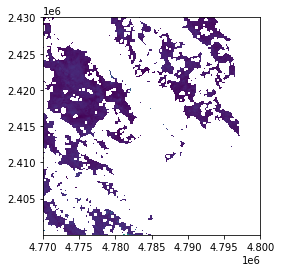

<AxesSubplot:>

In [1]:
import rasterio
from rasterio.plot import show

show(rasterio.open('/home/leandro/Tmp/Zenodo/9529_croatia/9529_croatia_rasters/2009/landsat_ard_winter_red_p50.tif'))

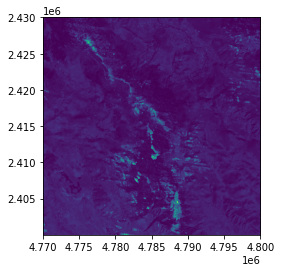

<AxesSubplot:>

In [2]:
show(rasterio.open('/home/leandro/Tmp/Zenodo/9529_croatia/9529_croatia_rasters_gapfilled/2009/landsat_ard_winter_red_p50.tif'))